<a href="https://colab.research.google.com/github/ConstanzaSchibber/capstone_colors/blob/main/notebooks/4_Comparison_of_Approaches_A_and_B_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparing CIELAB Shades Identified by Model A (clustering) and Model B (Multimodal Large Language Model `Claude`)



# Libraries

In [3]:
from IPython.display import Image

In [4]:
import cv2
import numpy as np
import pandas as pd
import glob
from PIL import Image
import time

In [5]:
import base64
import requests
import os
from PIL import Image
from io import BytesIO

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from skimage import color
from skimage.color import rgb2lab, lab2rgb
import ast

In [7]:
from google.colab import drive

# Mount Google Drive to access files stored there
# The 'force_remount=True' option ensures that the drive is remounted even if it is already mounted
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Load Metadata

In [8]:
df = pd.read_csv('/content/drive/MyDrive/df_llm_2.csv')
df.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'category', 'joined',
       'brand', 'product', 'shade', 'img_url', 'shade_description_original',
       'id', 'validation', 'img_name', 'mean_lab', 'peak_lab', 'sd_color',
       'ground_truth', 'ground_truth_CIELAB', 'diff_lab', 'diff_peak_black',
       'diff_peak_white', 'mean_lab_2', 'peak_lab_2', 'diff_lab_2',
       'mean_lab_3', 'peak_lab_3', 'diff_lab_3', 'Claude_CIELAB',
       'Claude_message', 'diff_llm_lab', 'is_list_LLM', 'Claude_message_2',
       'Claude_CIELAB_2', 'is_list_LLM_2', 'diff_llm_lab_2'],
      dtype='object')

# Comparing Delta E for Approaches A and B

The first scatterplot presents a comparison between the color accuracy of two methods—Clustering (Method A) and LLM (Method B)—across all makeup products. The x-axis represents the Delta E values for the LLM method, and the y-axis represents the Delta E values for the Clustering method. Points above the diagonal line (where x = y) indicate cases where Clustering performed worse than the LLM (because the Delta E values for the clustering approach are higher), while points below the line indicate where LLM achieved a better color match than the clustering method (because the Delta E was smaller).

General Trend: The distribution of points shows that for most cases, the Clustering method tends to have higher Delta E values (points above the diagonal line), suggesting it generally provides worse color accuracy than LLM. However, there are still several instances where Clustering outperforms LLM.

The subsequent scatterplots break down the comparison by specific product categories: Blush, Lipgloss, Lipliner, and Lipstick.

In the Blush category, the points are more evenly distributed around the diagonal line. However, a larger proportion of points are above the line, indicating that the Clustering method often has worse color accuracy in this category.

The Lipgloss scatterplot shows a similar trend to Blush, with a slight majority of points above the diagonal line. This suggests that LLM is more accurate, on average.

The Lipliner category presents a more balanced scenario, with points almost equally distributed on either side of the diagonal line. This indicates that both methods perform similarly, with no clear winner.

Finally, in the Lipstick category, the scatterplot clearly shows that the LLM method outperforms clustering in a majority of cases, as indicated by a significant concentration of points above the diagonal line. In other words, the LLM provides noticeably better color accuracy compared to clustering approach, probably because the prompt was able to incorporate information about the makeup packaging.

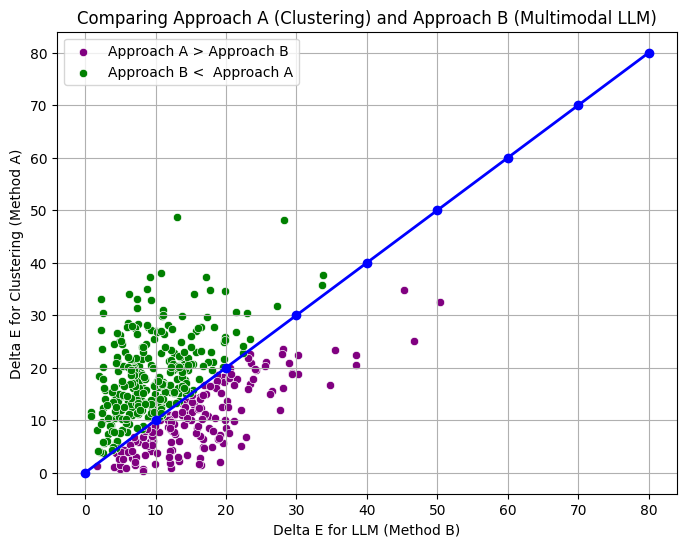

In [15]:
# Assuming df is your DataFrame and 'diff_llm_lab_2' and 'diff_lab_3' are your columns
x = df['diff_llm_lab_2']
y = df['diff_lab_3']

# Create a scatter plot
plt.figure(figsize=(8, 6))

# Plot the points where x > y in red
sns.scatterplot(data=df[x > y], x=x[x > y], y=y[x > y], color='purple', label='Approach A > Approach B')

# Plot the points where x < y in green
sns.scatterplot(data=df[x < y], x=x[x < y], y=y[x < y], color='green', label='Approach B <  Approach A')

# Plot the line where x = y
line_x = line_y = [0, 10, 20, 30, 40, 50, 60, 70, 80]
plt.plot(line_x, line_y, color='blue', linestyle='-', linewidth=2, marker='o')

# Labels and title
plt.xlabel('Delta E for LLM (Method B)')
plt.ylabel('Delta E for Clustering (Method A)')
plt.title('Comparing Approach A (Clustering) and Approach B (Multimodal LLM)')

plt.grid(True)
plt.legend()
plt.show()


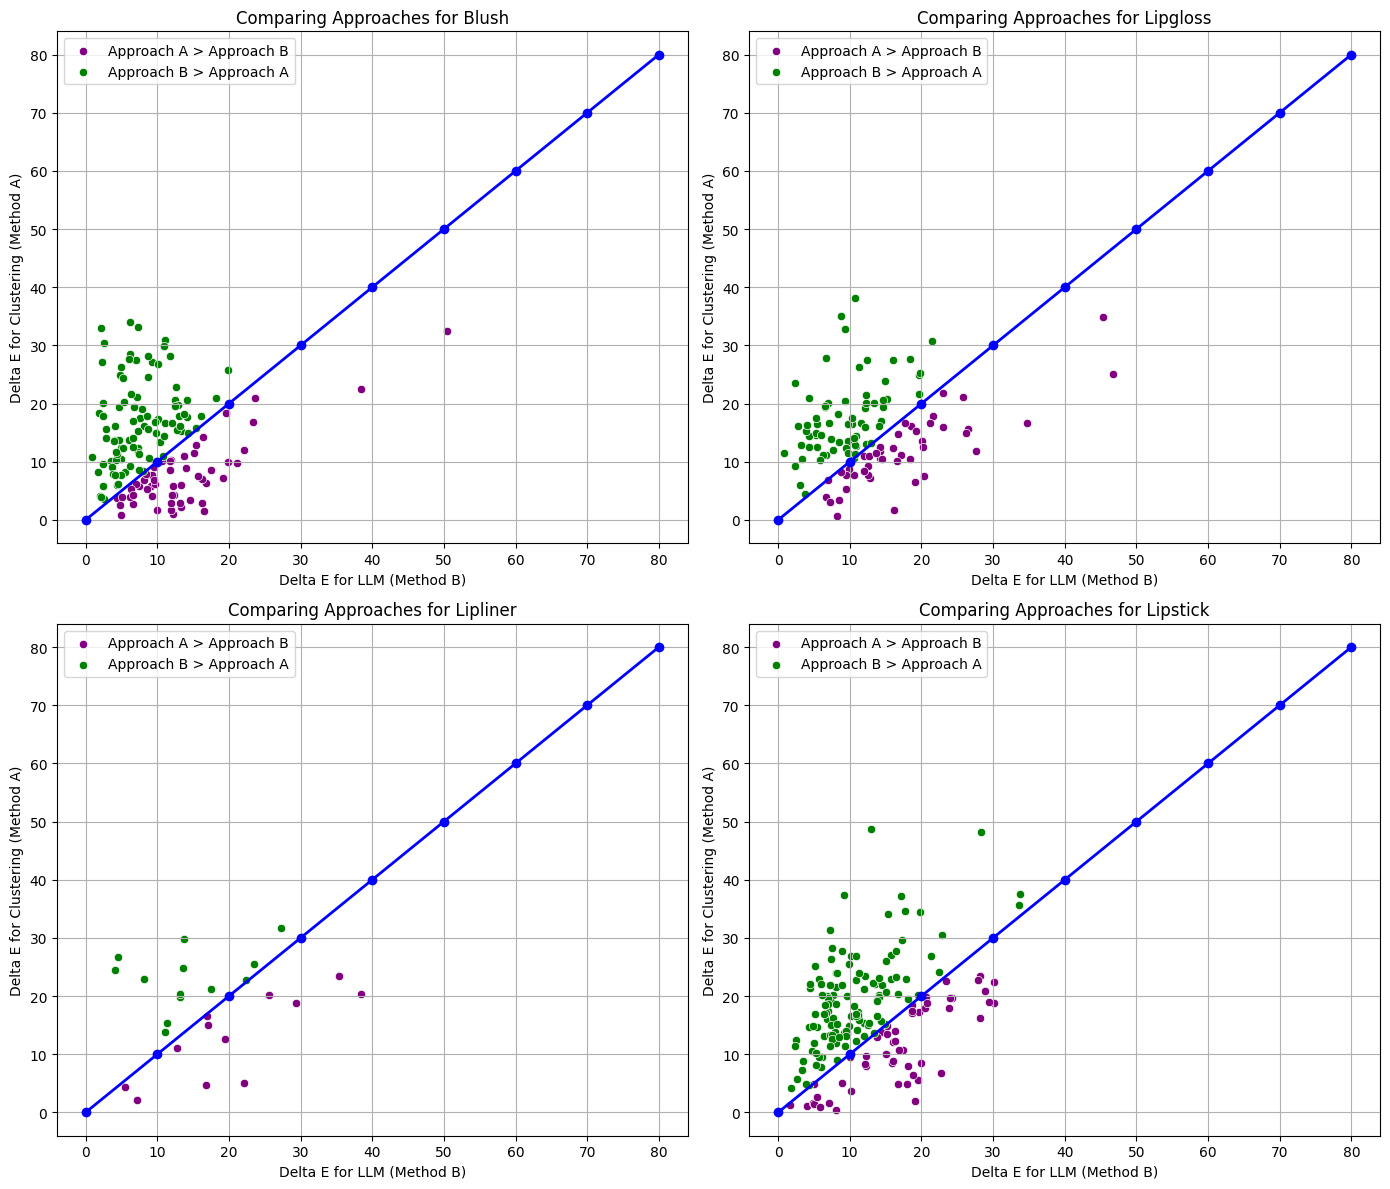

In [25]:
# Define the categories you want to plot
categories = ['blush', 'lipgloss', 'lipliner', 'lipstick']

# Create a figure with 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Define line values for the line plot
line_x = line_y = [0, 10, 20, 30, 40, 50, 60, 70, 80]

# Loop over the categories and corresponding subplot axes
for i, category in enumerate(categories):
    data_category = df[df.category == category]
    x = data_category.diff_llm_lab_2
    y = data_category.diff_lab_3

    # Determine the current axis
    ax = axs[i // 2, i % 2]

    # Plot the points where x > y in purple
    sns.scatterplot(ax=ax, data=data_category[x > y], x=x[x > y], y=y[x > y], color='purple', label='Approach A > Approach B')

    # Plot the points where x < y in green
    sns.scatterplot(ax=ax, data=data_category[x < y], x=x[x < y], y=y[x < y], color='green', label='Approach B > Approach A')

    # Plot the line where x = y
    ax.plot(line_x, line_y, color='blue', linestyle='-', linewidth=2, marker='o')

    # Set the labels and title
    ax.set_xlabel('Delta E for LLM (Method B)')
    ax.set_ylabel('Delta E for Clustering (Method A)')
    ax.set_title(f'Comparing Approaches for {category.capitalize()}')

    ax.grid(True)
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

The table shows the comparison between two methods—LLM (Method B) and Clustering (Method A)—across different makeup categories. The percentages indicate how often one method outperforms the other in terms of color accuracy. Better performance in color matching is achieved when the Delta E is lower. Thus, if `LLM > Clustering` it means the Delta E for LLM is greater than for clustering, and clustering outperforms LLM in those cases, whereas if `Clustering > LLM`, then LLM outperforms Clustering because the Delta E is smaller.

- Blush: The LLM approach outperforms the Clustering in 59.76% of cases, while Clustering is better in 34.15% of cases.
- Lipgloss: Similarly, LLM is more accurate 57.38% of the time, compared to Clustering's 36.89%.
- Lipliner: This category shows a more balanced performance, with LLM having a slight edge (44.83%) over Clustering (41.38%).
- Lipstick: LLMs performs significantly better, with 62.83% of cases, while clustering outperforms in only 28.27% of cases.

Overall, the Multimodals LLM generally shows higher accuracy across all categories, especially in the Lipstick category.

In [32]:
# Define categories
categories = ['blush', 'lipgloss', 'lipliner', 'lipstick']

# Initialize an empty list to store the results
results = []

# Loop through each category to calculate the percentages
for category in categories:
    data_category = df[df.category == category]
    x = data_category.diff_llm_lab_2
    y = data_category.diff_lab_3

    # Calculate percentages
    percent_x_greater = (x > y).mean() * 100
    percent_y_greater = (y > x).mean() * 100

    # Append the results to the list
    results.append({
        'Category': category,
        'LLM > Clustering': round(percent_x_greater, 2),
        'Clustering > LLM': round(percent_y_greater, 2)
    })

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)

# Display the table
print('% of Cases in which Delta E is greater')
print(results_df)

% of Cases in which Delta E is greater
   Category  LLM > Clustering  Clustering > LLM
0     blush             34.15             59.76
1  lipgloss             36.89             57.38
2  lipliner             41.38             44.83
3  lipstick             28.27             62.83


In [31]:
# Define categories
categories = ['blush', 'lipgloss', 'lipliner', 'lipstick']

# Initialize an empty list to store the results
results = []

# Loop through each category to calculate the percentages
for category in categories:
    data_category = df[df.category == category]
    x = data_category.diff_llm_lab_2
    y = data_category.diff_lab_3

    # Calculate percentages
    percent_x_greater = (x > y).var() * 100
    percent_y_greater = (y > x).var() * 100

    # Append the results to the list
    results.append({
        'Category': category,
        '% LLM > Clustering': round(percent_x_greater, 2),
        '% Clustering > LLM': round(percent_y_greater, 2)
    })

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)

# Display the table
print(results_df)

   Category  % LLM > Clustering  % Clustering > LLM
0     blush               22.62               24.20
1  lipgloss               23.47               24.66
2  lipliner               25.12               25.62
3  lipstick               20.39               23.48


# Image Size (bytes) Affects Method Performance

First, I extract image size information using functions from Notebook 1.

I use the function `os.path.getsize()` to find the size of an image in bytes. It takes a file path as an argument and returns an integer representing the file's size on the filesystem. Larger image sizes often correlate with better quality because they contain more pixels, which can lead to higher resolution and more detail. This additional information can result in sharper images with finer detail



In [49]:
# Initialize empty lists to store the information
df['sizes'] = pd.Series(dtype='object')

for i in range(len(df)):
  file = df.img_name[i]
  if file.lower().endswith(('.png', '.jpg', '.jpeg', '.tif')):
    # Load the image file using OpenCV
    img_path = os.path.join('/content/drive/My Drive/makeup_img/', file)
    img = cv2.imread(img_path)

    # Extract the size of the image
    size = os.path.getsize(img_path)
    df.loc[i, 'sizes'] = size

Then, I plot the Delta E for each approach against the (logged) image size. The log transformation of image size helps to reveal a more linear relationship between image size and performance, which can simplify interpretation and potentially uncover underlying patterns that might not be apparent in the original scale.

The figure shows that both the clustering method (A) and the multimodal LLM approach using Claude (B) perform better at identifying color share as image size increases. The regression lines have a negative slope, indicating that as image size increases, Delta E decreases, indicating better color identification. This improvement is likely due to the higher resolution and detail available in larger images. With more pixels, both methods have access to a greater wealth of color information, allowing for more accurate analysis. The clustering algorithm can form more precise color groups, while Claude, the LLM, can leverage its visual understanding on clearer, more detailed images. Larger images also tend to have more defined boundaries between color regions, reducing the impact of noise or compression artifacts that can skew results in smaller images. The additional data points in larger images provide a more representative sample of the overall color distribution, enabling both the clustering algorithm and Claude to make more precise and reliable color share estimations.

In a nutshell, low quality images should not be used for color identification. In the figure, we see that for images with a logged image size below 8 (or 2980 pixels), predictions have, on average, a Delta E above 15, while the largest images have an average Delta E below 10.

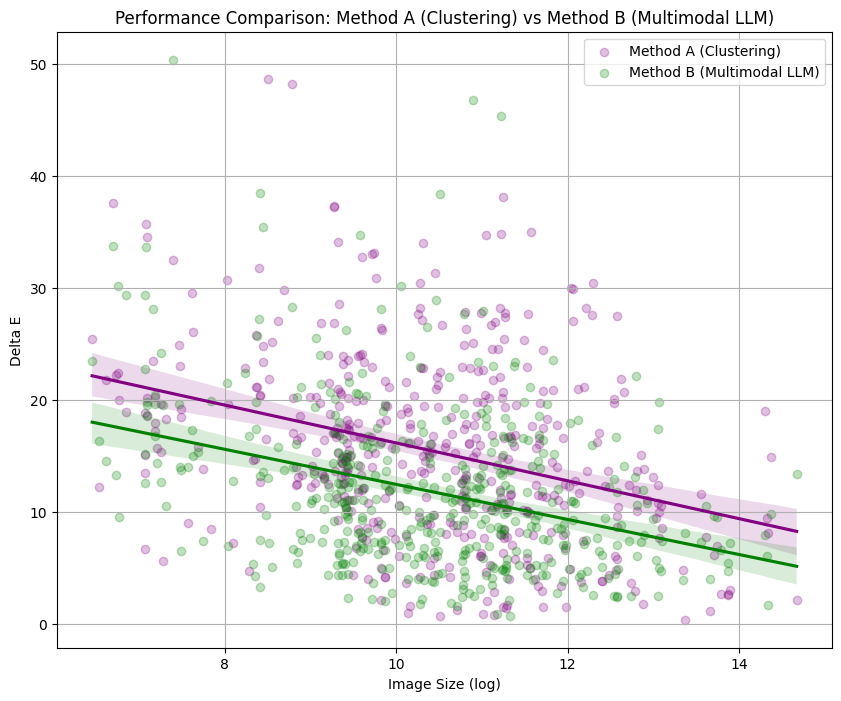

In [89]:
# Columns
y1 = df['diff_lab_3']
y2 = df['diff_llm_lab_2']
x = df['sizes'].astype(float)

# Applying log
log_x = np.log(x)

# Create a scatter plot
plt.figure(figsize=(10, 8))

# Plot the points for Method A (Clustering)
sns.regplot(x=log_x, y=y1, color='purple', scatter_kws={"color": "purple", "alpha": 0.25},
            line_kws={"color": "purple"}, label='Method A (Clustering)')

# Plot the points for Method B (Multimodal LLM)
sns.regplot(x=log_x, y=y2, color='green', scatter_kws={"color": "green", "alpha": 0.25},
            line_kws={"color": "green"}, label='Method B (Multimodal LLM)')

# Labels and title
plt.ylabel('Delta E')
plt.xlabel('Image Size (log)')
plt.title('Performance Comparison: Method A (Clustering) vs Method B (Multimodal LLM)')

plt.grid(True)
plt.legend()
plt.show()

In [90]:
np.exp(8)

2980.9579870417283

# Qualitative Comparison

In Notebook 2.1 (Approach A), there was a set of images with increasing Delta E along with the predicted color (top left square) and ground truth color (top right square). I present these images again along with the same images, but with the predicted color using Approach B; the Delta E for these images is slightly different that for the first set of images.

In the top row, there are similarities, though the image on the right has minor improvement. Two images in the bottom row (left, right) show improvement in the Approach B, while the middle image still has a higher Delta E.

In [159]:
image_selection = [81, 2, 9, 19, 498, 156]
category_deltaE = ['Delta E < 5', 'Delta E between [5, 10)]', 'Delta E between [10, 15)]', 'Delta E between [15, 20)]','Delta E between [20, 25)]','Delta E between [25, 30)]' ]
category_deltaE_2 = ['Delta E < 5', 'Delta E between [15, 20)]', 'Delta E between [10, 15)]', 'Delta E between [5, 10)]','Delta E between [20, 25)]','Delta E between [10, 15)]' ]

df_subset = df.iloc[image_selection]
df_subset = df_subset.reset_index()

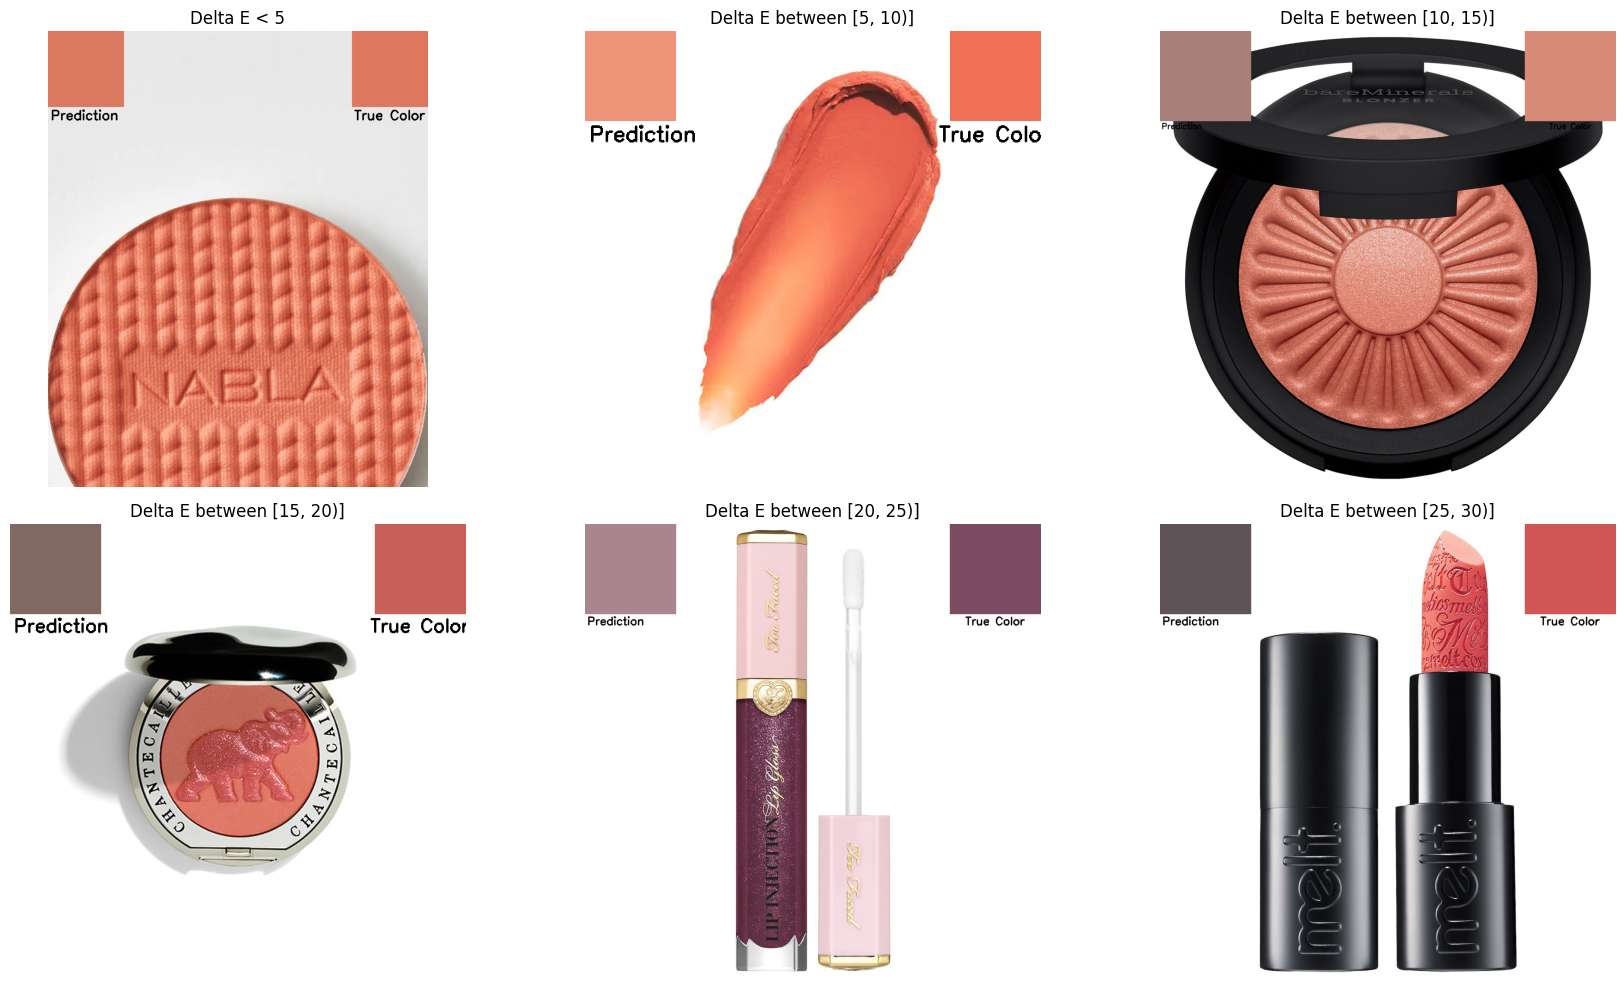

In [103]:
from skimage import color
from skimage.color import rgb2lab, lab2rgb
import ast

# Create a figure with 6 subplots (2 rows, 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # Adjust figsize as needed

for i in range(len(df_subset)):  # Assuming you have a loop or similar structure to process 6 images
    # Get the current subplot's axis
    path = '/content/drive/MyDrive/makeup_img/' + str(df_subset.img_name[i])
    # Read test image
    swatch = cv2.imread(path)
    RGB_img = cv2.cvtColor(swatch, cv2.COLOR_BGR2RGB)

    # Get the current subplot
    ax = axes[i // 3, i % 3]  # Row: i // 3, Column: i % 3

    # Assuming RGB_img is defined and available for each iteration
    ax.imshow(RGB_img)  # Display the original image on the subplot

    # Square patch parameters
    height, width, _ = RGB_img.shape
    square_size = min(height, width) // 5  # Size of the square relative to the image size

    # Predicted color square
    pred_lab = df_subset.mean_lab_3[i]
    xyz_pred = color.lab2xyz(ast.literal_eval(pred_lab))
    rgb_pred = color.xyz2rgb(xyz_pred)
    rgb_pred = np.clip(rgb_pred.reshape(3), 0, 1)  # Ensure values are within [0, 1] range
    rgb_pred = (rgb_pred * 255).astype(int)
    square_patch_pred = np.ones((square_size, square_size, 3)) * rgb_pred

    # Ground truth color square
    ground_truth_col_lab = list(map(float, df_subset.ground_truth_CIELAB[i].strip('[]').split()))
    xyz_ground_truth = color.lab2xyz(ground_truth_col_lab)
    rgb_ground_truth = color.xyz2rgb(xyz_ground_truth)
    rgb_ground_truth = np.clip(rgb_ground_truth.reshape(3), 0, 1)  # Ensure values are within [0, 1] range
    rgb_ground_truth = (rgb_ground_truth * 255).astype(int)
    square_patch_truth = np.ones((square_size, square_size, 3)) * rgb_ground_truth

    # Place the predicted color square on the top-left corner of the image
    RGB_img[:square_size, :square_size] = square_patch_pred

    # Place the ground truth color square on the top-right corner of the image
    start_col = RGB_img.shape[1] - square_size
    RGB_img[:square_size, start_col:] = square_patch_truth

    # Add text under the squares
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.8
    font_thickness = 2
    text_color = (0, 0, 0)  # black text color

    # Predicted color text Method A
    text_pred = "Prediction"
    text_size_pred = cv2.getTextSize(text_pred, font, font_scale, font_thickness)[0]
    text_x_pred = 5  # Left-aligned text under the left square
    text_y_pred = square_size + text_size_pred[1] + 5
    RGB_img = cv2.putText(RGB_img, text_pred, (text_x_pred, text_y_pred), font, font_scale, text_color, font_thickness)

    # Ground truth color text
    text_truth = "True Color"
    text_size_truth = cv2.getTextSize(text_truth, font, font_scale, font_thickness)[0]
    text_x_truth = start_col + (square_size - text_size_truth[0]) // 2  # Centered text under the right square
    text_y_truth = square_size + text_size_truth[1] + 5
    RGB_img = cv2.putText(RGB_img, text_truth, (text_x_truth, text_y_truth), font, font_scale, text_color, font_thickness)

    # Add a title to each subplot
    ax.set_title(category_deltaE[i])  # Customize the title as needed

    # Display the modified image in the current subplot
    ax.imshow(RGB_img)
    ax.axis('off')  # Hide axes for clarity

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


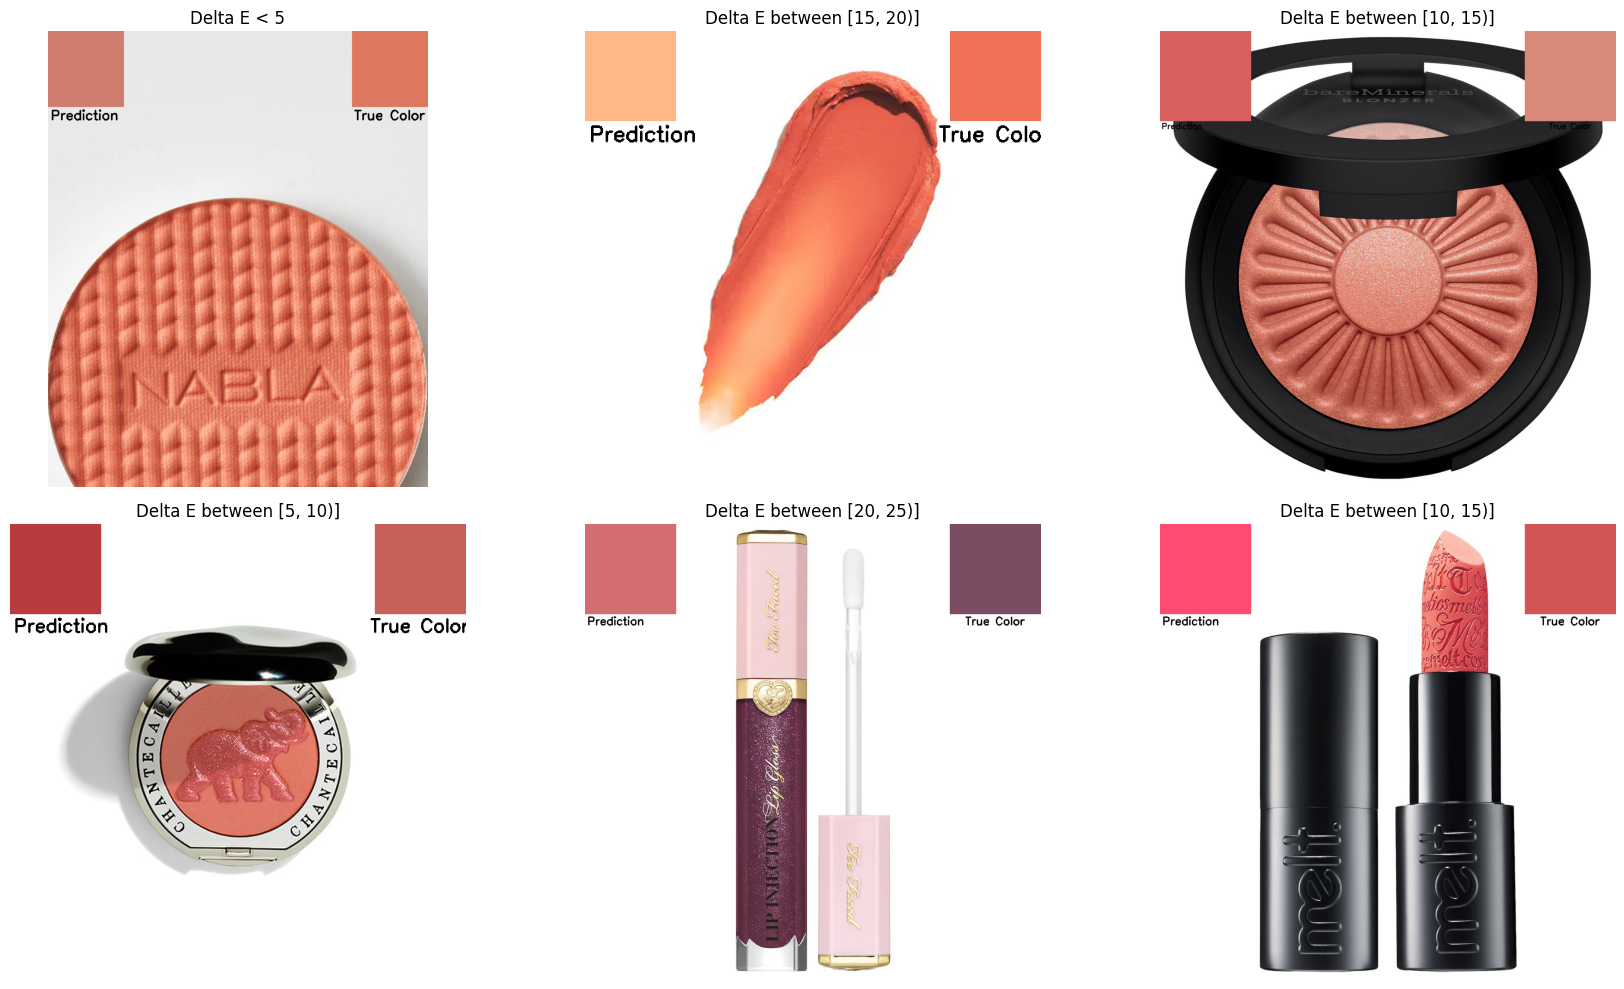

In [161]:
# Create a figure with 6 subplots (2 rows, 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # Adjust figsize as needed

for i in range(len(df_subset)):  # Assuming you have a loop or similar structure to process 6 images
    # Get the current subplot's axis
    path = '/content/drive/MyDrive/makeup_img/' + str(df_subset.img_name[i])
    # Read test image
    swatch = cv2.imread(path)
    RGB_img = cv2.cvtColor(swatch, cv2.COLOR_BGR2RGB)

    # Get the current subplot
    ax = axes[i // 3, i % 3]  # Row: i // 3, Column: i % 3

    # Assuming RGB_img is defined and available for each iteration
    ax.imshow(RGB_img)  # Display the original image on the subplot

    # Square patch parameters
    height, width, _ = RGB_img.shape
    square_size = min(height, width) // 5  # Size of the square relative to the image size

    # Predicted color square
    pred_lab = ast.literal_eval(df_subset.Claude_CIELAB_2[i])
    pred_lab  = np.array(pred_lab, dtype=float)
    xyz_pred = color.lab2xyz(pred_lab)
    rgb_pred = color.xyz2rgb(xyz_pred)
    rgb_pred = np.clip(rgb_pred.reshape(3), 0, 1)  # Ensure values are within [0, 1] range
    rgb_pred = (rgb_pred * 255).astype(int)
    square_patch_pred = np.ones((square_size, square_size, 3)) * rgb_pred

    # Ground truth color square
    ground_truth_col_lab = list(map(float, df_subset.ground_truth_CIELAB[i].strip('[]').split()))
    xyz_ground_truth = color.lab2xyz(ground_truth_col_lab)
    rgb_ground_truth = color.xyz2rgb(xyz_ground_truth)
    rgb_ground_truth = np.clip(rgb_ground_truth.reshape(3), 0, 1)  # Ensure values are within [0, 1] range
    rgb_ground_truth = (rgb_ground_truth * 255).astype(int)
    square_patch_truth = np.ones((square_size, square_size, 3)) * rgb_ground_truth

    # Place the predicted color square on the top-left corner of the image
    RGB_img[:square_size, :square_size] = square_patch_pred

    # Place the ground truth color square on the top-right corner of the image
    start_col = RGB_img.shape[1] - square_size
    RGB_img[:square_size, start_col:] = square_patch_truth

    # Add text under the squares
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.8
    font_thickness = 2
    text_color = (0, 0, 0)  # black text color

    # Predicted color text Method B
    text_pred = "Prediction"
    text_size_pred = cv2.getTextSize(text_pred, font, font_scale, font_thickness)[0]
    text_x_pred = 5  # Left-aligned text under the left square
    text_y_pred = square_size + text_size_pred[1] + 5
    RGB_img = cv2.putText(RGB_img, text_pred, (text_x_pred, text_y_pred), font, font_scale, text_color, font_thickness)

    # Ground truth color text
    text_truth = "True Color"
    text_size_truth = cv2.getTextSize(text_truth, font, font_scale, font_thickness)[0]
    text_x_truth = start_col + (square_size - text_size_truth[0]) // 2  # Centered text under the right square
    text_y_truth = square_size + text_size_truth[1] + 5
    RGB_img = cv2.putText(RGB_img, text_truth, (text_x_truth, text_y_truth), font, font_scale, text_color, font_thickness)

    # Add a title to each subplot
    ax.set_title(category_deltaE_2[i])  # Customize the title as needed

    # Display the modified image in the current subplot
    ax.imshow(RGB_img)
    ax.axis('off')  # Hide axes for clarity

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

# Adding Color Predicted to the DataFrame

To show the hue predicted in the Streamlit app, I am adding HTML code in the pandas dataframe that will show a circle in the hue predicted by the Multimodal LLM.

In [12]:
def lab_to_hex(lab):

    # lab
    lab = ast.literal_eval(lab)
    lab = np.array(lab, dtype=float)
    # Convert LAB to RGB
    rgb = color.lab2rgb(np.array(lab).reshape(1, 1, 3))

    # Convert RGB to hex
    hex_color = '#{:02x}{:02x}{:02x}'.format(
        int(rgb[0][0][0] * 255),
        int(rgb[0][0][1] * 255),
        int(rgb[0][0][2] * 255)
    )

    return hex_color

In [13]:
# Assuming your DataFrame is called 'df' and the column with CIELAB colors is 'lab_colors'
df['hex_colors'] = df['Claude_CIELAB_2'].apply(lab_to_hex)

In [14]:
# Function to generate HTML for colored circle
def color_circle(color):
    return f'<div style="width:20px; height:20px; border-radius:50%; background-color:{color};"></div>'


In [15]:
# Apply the function to the DataFrame
df['Circle'] = df['hex_colors'].apply(color_circle)

In [16]:
df_mini = df[['id','hex_colors', 'Circle']]
# Display the DataFrame with HTML rendering
from IPython.display import display, HTML
display(HTML(df_mini.to_html(escape=False)))

,id,hex_colors,Circle
0,1,#c47f6e,
1,2,#ffc9c0,
2,3,#ffb787,
3,4,#f6e7e7,
4,5,#e89a87,
5,6,#f89684,
6,7,#de9592,
7,8,#8e4f42,
8,9,#d85d78,
9,10,#d8605d,


# Sorting and Organizing Products by Shade

[Color sorting](https://www.alanzucconi.com/2015/09/30/colour-sorting/) is a difficult task.

In this section, I organize colors by shade to provide an easy way for users to filter makeup by shade in the App.

To organize the predicted colors of makeup products by similarity, I calculated the Delta E value for each product against all others to quantify the color differences. I then applied K-means clustering to group the products by color similarity, determining the optimal number of clusters using the elbow method, which identified 8 distinct clusters. To validate and visualize these clusters, I performed Principal Component Analysis (PCA) and plotted the first two principal components, which also revealed 8 clear groups. The consistency between K-means and PCA supports the robustness of the identified clusters, providing a strong foundation for organizing the makeup colors.

Finally, I find the median shade in each cluster, to use as representative of the cluster inside the app. Users will be able to find filter makeup with this shade.

In [17]:
from skimage.color import deltaE_ciede2000

In [18]:
# Calculate pairwise Delta E
n = len(df)
delta_e_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        if i != j:
            delta_e = deltaE_ciede2000(ast.literal_eval(df.Claude_CIELAB_2[i]), ast.literal_eval(df.Claude_CIELAB_2[j]))
            delta_e_matrix[i, j] = delta_e

In [19]:
# Create a DataFrame from the Delta E matrix
delta_e_df = pd.DataFrame(delta_e_matrix, index=df.index, columns=df.index)

# Find the closest color match for each row
closest_matches = delta_e_df.apply(lambda x: x.nsmallest(2).index[1], axis=1)

In [20]:
delta_e_df.shape

(506, 506)

In [21]:
delta_e_df.head()

,0,1,2,3,4,5,6,7,8,9,...,496,497,498,499,500,501,502,503,504,505
0,0.000000,20.365415,19.005005,28.605172,9.064582,10.676280,9.070909,18.994869,15.092130,9.627720,...,15.665501,30.452048,9.132005,8.965062,27.922875,17.616440,15.470656,23.571834,12.920077,11.993746
1,20.365415,0.000000,12.709805,14.796958,12.067969,12.302326,12.966860,38.444899,26.737719,25.414090,...,30.326234,52.277351,23.081657,24.671602,10.923038,23.521799,5.862877,39.272840,18.384430,9.099158
2,19.005005,12.709805,0.000000,21.388462,11.433608,12.123374,16.977756,36.574583,30.852272,25.110976,...,33.129874,51.716936,25.239789,25.904255,19.412015,27.489776,8.955871,42.106814,24.834354,14.294333
3,28.605172,14.796958,21.388462,0.000000,22.532404,23.719619,22.697478,44.613344,34.392882,34.408886,...,37.705072,58.283134,31.825832,33.300120,5.570504,32.425461,18.087227,45.104246,26.516252,19.958413
4,9.064582,12.067969,11.433608,22.532404,0.000000,3.534121,6.012340,28.026753,19.397373,15.084448,...,21.866175,42.326582,14.008050,14.959632,20.860912,17.858463,6.637396,31.106115,13.572628,5.404702


In [23]:
# Add closest match and its Delta E to the original DataFrame
df['closest_match'] = closest_matches
df['closest_match_delta_e'] = df.apply(lambda row: delta_e_df.loc[row.name, row['closest_match']], axis=1)

# Sort the DataFrame by Delta E to get overall closest matches
df_sorted = df.sort_values('closest_match_delta_e')

print(df_sorted[['Claude_CIELAB_2', 'closest_match', 'closest_match_delta_e']])

         Claude_CIELAB_2  closest_match  closest_match_delta_e
505         [74, 26, 14]            505               0.000000
28          [70, 35, 20]            195               0.000000
415         [40, 60, 30]            415               0.000000
285         [74, 26, 14]            505               0.000000
47          [65, 30, 20]            212               0.000000
..                   ...            ...                    ...
276     [77.8, 1.3, 5.5]             59               8.215017
315   [45.0, 70.0, -5.0]            240               8.745477
462         [18, 47, 33]            318               9.444826
302         [36, 48, 72]            316              13.998844
251  [74.0, 31.0, -56.0]            221              23.635081

[506 rows x 3 columns]


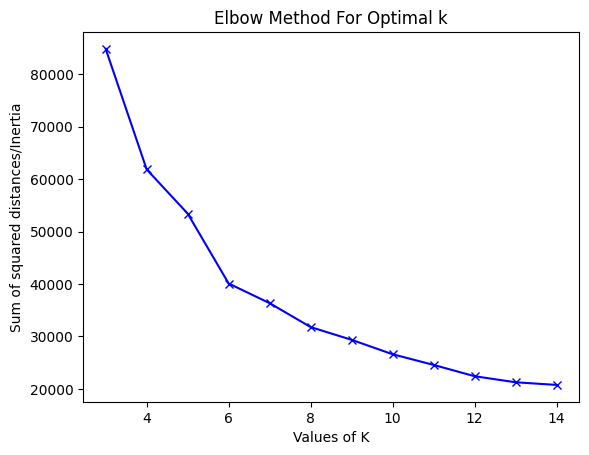

In [30]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming you already have delta_e_df

# Step 1: Prepare the data: Delta E values
X = delta_e_df.values

# Step 2: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Identify best K for K-means
Sum_of_squared_distances = []
K = range(3,15)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters, n_init = 'auto')
 kmeans.fit(X_scaled)
 Sum_of_squared_distances.append(kmeans.inertia_)

plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Sum of squared distances/Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [41]:
# Step 3: Perform K-means clustering
n_clusters = 10  # for example, to create 5 color groups
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init = 'auto')
cluster_labels = kmeans.fit_predict(X_scaled)

# Step 4: Add cluster labels to your original dataframe
df['color_group'] = cluster_labels

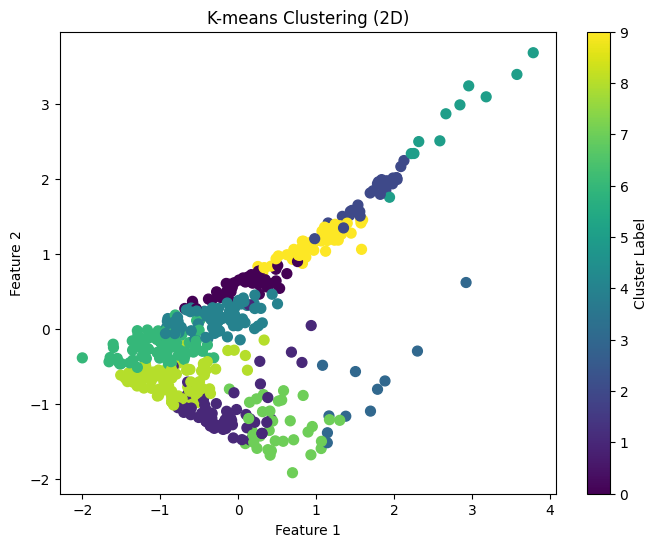

In [42]:
# Assuming X_scaled has two features (for simplicity)
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.title('K-means Clustering (2D)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

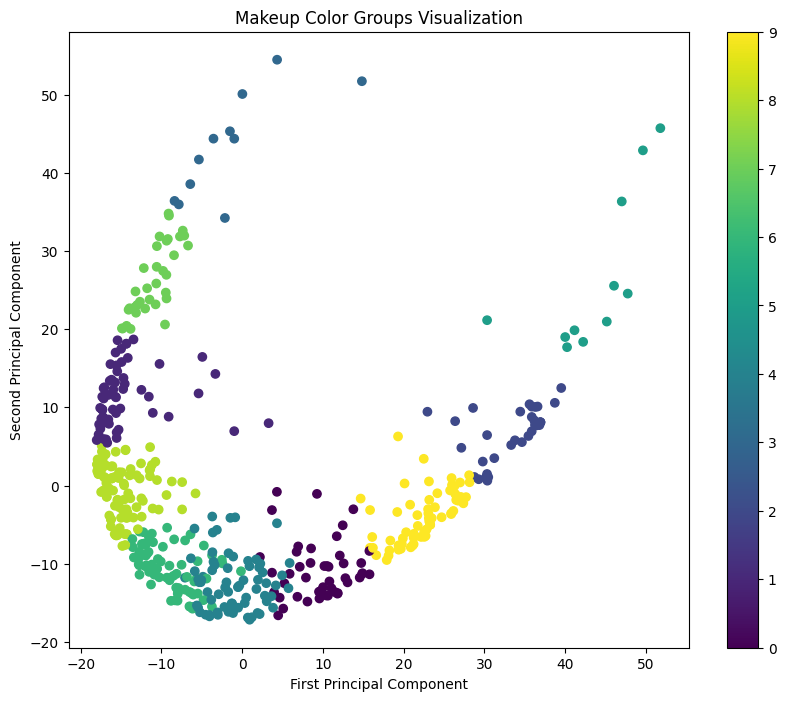

In [43]:
# Visualize the clusters using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.colorbar(scatter)
plt.title('Makeup Color Groups Visualization')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

Below, I show the groups have between 19% to 2.17% of the products. The most popular shades are in group 8.

In [70]:
round(df['color_group'].value_counts()/len(df)*100,2)

,count
color_group,
8,18.97
6,15.02
4,14.43
9,12.65
1,12.06
0,9.29
7,6.72
2,6.52
3,2.17


Checking the colors in group '3':

Below, I show the shades that were classified as 'group 3':

In [47]:
mini = df[df.color_group == 3]
df_mini = mini[['id','hex_colors', 'Circle']]
# Display the DataFrame with HTML rendering
from IPython.display import display, HTML
display(HTML(df_mini.to_html(escape=False)))

,id,hex_colors,Circle
3,4,#f6e7e7,
22,25,#ffd9d5,
42,46,#ffdac6,
54,58,#ffe4c9,
129,139,#ffd28d,
251,271,#b3a7ff,
252,272,#ffefd4,
276,300,#c7bfb6,
321,347,#f6efdf,
469,502,#ffdccf,


Finally, I calculated and organized the median color for each group, providing a representative color to user for user-search in the app.

In [62]:
# Step 1: Define a function to find the median string
def median_of_strings(strings):
    sorted_strings = sorted(strings)
    length = len(sorted_strings)

    # If odd, return the middle string
    if length % 2 == 1:
        return sorted_strings[length // 2]
    # If even, return the first of the two middle strings (you can adjust this as needed)
    else:
        return sorted_strings[(length // 2) - 1]

# Step 2: Apply the function by group
median_hex_group = df.groupby('color_group')['hex_colors'].apply(median_of_strings)

In [64]:
median_hex_group

,hex_colors
color_group,
0,#c13744
1,#f3a3a7
2,#8c251e
3,#ffd9d5
4,#dd4b7a
5,#5e1920
6,#da7670
7,#f9c2b5
8,#e5817c


In [65]:
# Step 3: Merge the result back into the original DataFrame (optional)
df = df.merge(median_hex_group.rename('median_hex_group'), on='color_group', how='right')

In [66]:
df.shape

(506, 41)

In [67]:
df['median_hex_circle'] = df['median_hex_group'].apply(color_circle)

Below, I show the median shade for 'group 3':

In [68]:
mini = df[df.color_group == 3]
df_mini = mini[['median_hex_circle','hex_colors', 'Circle']]
# Display the DataFrame with HTML rendering
from IPython.display import display, HTML
display(HTML(df_mini.to_html(escape=False)))

,median_hex_circle,hex_colors,Circle
141,,#f6e7e7,
142,,#ffd9d5,
143,,#ffdac6,
144,,#ffe4c9,
145,,#ffd28d,
146,,#b3a7ff,
147,,#ffefd4,
148,,#c7bfb6,
149,,#f6efdf,
150,,#ffdccf,


# Conclusion

In comparing the clustering method against the LLM approach using Claude for color share identification, our analysis reveals that the LLM consistently outperformed the clustering technique. Both methods showed improved accuracy with larger image sizes, likely due to the increased availability of color information and detail.

However, the LLM demonstrated superior performance across all product categories and image sizes, suggesting its more sophisticated understanding of visual content, context, and color relationships. This study underscores the potential of advanced AI models in image analysis tasks, while also highlighting the importance of image resolution in achieving accurate results. The findings suggest that for optimal color share identification, using high-resolution images with an LLM-based approach may yield the most reliable outcomes.